<a href="https://colab.research.google.com/github/anisvasanth/AI-DS/blob/main/ANIS-ARYAN(562-573).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas scikit-learn

In [2]:
!pip install matplotlib

Choose a dataset: iris, wine, cancer, digits
Enter dataset name: iris
Model Accuracy for Iris Dataset: 100.00%


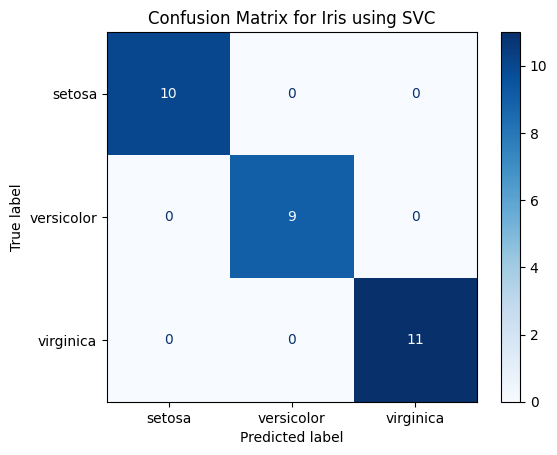

<ipython-input-11-13a0de7b3793>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[dataset_choice], y=[accuracy], palette="Blues_d")


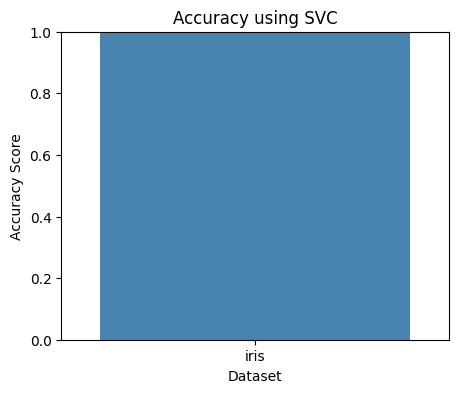

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, load_digits

# Function to load dataset based on user choice
def load_dataset(choice):
    if choice == "iris":
        data = load_iris()
    elif choice == "wine":
        data = load_wine()
    elif choice == "cancer":
        data = load_breast_cancer()
    elif choice == "digits":
        data = load_digits()
    else:
        raise ValueError("Invalid dataset choice. Choose 'iris', 'wine', 'cancer', or 'digits'")
    return data

# User selects the dataset
print("Choose a dataset: iris, wine, cancer, digits")
dataset_choice = input("Enter dataset name: ").strip().lower()

# Load dataset
data = load_dataset(dataset_choice)
X, y = data.data, data.target
feature_names = data.feature_names if dataset_choice != "digits" else [f"Pixel {i}" for i in range(X.shape[1])]
target_names = data.target_names if dataset_choice != "digits" else [str(i) for i in range(10)]

# Split the dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define and train the SVC model
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy for {dataset_choice.capitalize()} Dataset: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=target_names)
disp.plot(cmap="Blues")
plt.title(f"Confusion Matrix for {dataset_choice.capitalize()} using SVC")
plt.show()

# Visualize Accuracy using a Bar Graph
plt.figure(figsize=(5, 4))
sns.barplot(x=[dataset_choice], y=[accuracy], palette="Blues_d")
plt.xlabel("Dataset")
plt.ylabel("Accuracy Score")
plt.ylim(0, 1)
plt.title("Accuracy using SVC")
plt.show()
